In [1]:
#Ana and Explor ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy
#### Pre-processing
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#predications
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv(r"C:\Users\moham\Downloads\flights.csv")


In [3]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,...,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,...,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,...,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048573,2015,3,10,2,EV,4349,N14158,MSY,ORD,1013,...,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.shape)
print("The number of rows : " , df.shape[0])
print("The number of columns : " , df.shape[1])

(1048575, 31)
The number of rows :  1048575
The number of columns :  31


In [5]:
df1=df.drop(["YEAR","DAY_OF_WEEK","DAY","TAXI_OUT","TAXI_IN","WHEELS_OFF","CANCELLATION_REASON","DIVERTED"],axis=1)


In [6]:
df1

,MONTH,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,205.0,...,404.0,430,408.0,-22.0,0,NaN,NaN,NaN,NaN,NaN
1,1,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,280.0,...,737.0,750,741.0,-9.0,0,NaN,NaN,NaN,NaN,NaN
2,1,US,840,N171US,SFO,CLT,20,18.0,-2.0,286.0,...,800.0,806,811.0,5.0,0,NaN,NaN,NaN,NaN,NaN
3,1,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,285.0,...,748.0,805,756.0,-9.0,0,NaN,NaN,NaN,NaN,NaN
4,1,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,235.0,...,254.0,320,259.0,-21.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3,EV,4122,N11191,RDU,EWR,1013,1005.0,-8.0,96.0,...,1126.0,1149,1133.0,-16.0,0,NaN,NaN,NaN,NaN,NaN
1048571,3,UA,1018,N79279,LGA,IAH,1013,1005.0,-8.0,264.0,...,1324.0,1337,1335.0,-2.0,0,NaN,NaN,NaN,NaN,NaN
1048572,3,UA,1260,N76508,SAN,ORD,1013,1010.0,-3.0,251.0,...,1611.0,1624,1627.0,3.0,0,NaN,NaN,NaN,NaN,NaN
1048573,3,EV,4349,N14158,MSY,ORD,1013,1003.0,-10.0,149.0,...,1220.0,1242,1229.0,-13.0,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df1=df1.drop_duplicates()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046280 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   MONTH                1046280 non-null  int64  
 1   AIRLINE              1046280 non-null  object 
 2   FLIGHT_NUMBER        1046280 non-null  int64  
 3   TAIL_NUMBER          1040282 non-null  object 
 4   ORIGIN_AIRPORT       1046280 non-null  object 
 5   DESTINATION_AIRPORT  1046280 non-null  object 
 6   SCHEDULED_DEPARTURE  1046280 non-null  int64  
 7   DEPARTURE_TIME       1009051 non-null  float64
 8   DEPARTURE_DELAY      1009051 non-null  float64
 9   SCHEDULED_TIME       1046278 non-null  float64
 10  ELAPSED_TIME         1005495 non-null  float64
 11  AIR_TIME             1005495 non-null  float64
 12  DISTANCE             1046280 non-null  int64  
 13  WHEELS_ON            1007270 non-null  float64
 14  SCHEDULED_ARRIVAL    1046280 non-null  int64  
 15  ARR

In [9]:
df1.columns

Index(['MONTH', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [10]:
df1.isnull().sum()

MONTH                       0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER              5998
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          37229
DEPARTURE_DELAY         37229
SCHEDULED_TIME              2
ELAPSED_TIME            40785
AIR_TIME                40785
DISTANCE                    0
WHEELS_ON               39010
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            39010
ARRIVAL_DELAY           40785
CANCELLED                   0
AIR_SYSTEM_DELAY       817752
SECURITY_DELAY         817752
AIRLINE_DELAY          817752
LATE_AIRCRAFT_DELAY    817752
WEATHER_DELAY          817752
dtype: int64

In [11]:
df1["CANCELLED"].value_counts()

CANCELLED
0    1008039
1      38241
Name: count, dtype: int64

In [12]:
df1.duplicated().sum()

0

In [13]:
df1.describe()

,MONTH,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1.046280e+06,1.046280e+06,1.046280e+06,1.009051e+06,1.009051e+06,1.046278e+06,1.005495e+06,1.005495e+06,1.046280e+06,1.007270e+06,1.046280e+06,1.007270e+06,1.005495e+06,1.046280e+06,228528.000000,228528.000000,228528.000000,228528.000000,228528.000000
mean,1.694165e+00,2.257475e+03,1.322747e+03,1.333707e+03,1.133499e+01,1.402603e+02,1.369389e+02,1.127484e+02,8.035985e+02,1.485935e+03,1.504948e+03,1.492206e+03,7.612328e+00,3.654949e-02,13.692554,0.057328,18.203577,22.921458,3.545277
std,7.052673e-01,1.800201e+03,4.706970e+02,4.827411e+02,3.922387e+01,7.462443e+01,7.394802e+01,7.186943e+01,5.941509e+02,5.033508e+02,4.864900e+02,5.071084e+02,4.209383e+01,1.876530e-01,25.524897,1.779647,46.323146,41.888498,23.611555
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.100000e+01,2.000000e+01,1.500000e+01,7.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+00,7.550000e+02,9.200000e+02,9.280000e+02,-5.000000e+00,8.500000e+01,8.200000e+01,6.000000e+01,3.680000e+02,1.110000e+03,1.120000e+03,1.115000e+03,-1.200000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000e+00,1.724000e+03,1.319000e+03,1.329000e+03,-1.000000e+00,1.220000e+02,1.190000e+02,9.400000e+01,6.410000e+02,1.516000e+03,1.524000e+03,1.521000e+03,-3.000000e+00,0.000000e+00,4.000000,0.000000,2.000000,4.000000,0.000000
75%,2.000000e+00,3.488000e+03,1.720000e+03,1.731000e+03,1.100000e+01,1.730000e+02,1.690000e+02,1.440000e+02,1.046000e+03,1.911000e+03,1.915000e+03,1.917000e+03,1.200000e+01,0.000000e+00,19.000000,0.000000,18.000000,29.000000,0.000000
max,3.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03,7.180000e+02,7.660000e+02,6.870000e+02,4.983000e+03,2.400000e+03,2.359000e+03,2.400000e+03,1.971000e+03,1.000000e+00,830.000000,241.000000,1971.000000,1313.000000,1152.000000


In [14]:
df1.describe(include=['O'])

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT
count,1046280,1040282,1046280,1046280
unique,14,4522,315,315
top,WN,N477HA,ATL,ATL
freq,221388,809,66565,66700


In [15]:
cor=df1.corr(numeric_only=True)
cor

,MONTH,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
MONTH,1.000000,-0.008323,-0.003968,-0.000601,0.043723,0.001898,0.006686,0.004888,0.003181,-0.006594,-0.008274,-0.007456,0.045478,0.059937,0.006096,-0.005201,0.012724,0.007936,0.020691
FLIGHT_NUMBER,-0.008323,1.000000,-0.002593,0.003481,0.010246,-0.332242,-0.318376,-0.333237,-0.349035,-0.014696,-0.025137,-0.011019,0.035308,0.039492,-0.018555,-0.006802,0.001720,0.051473,-0.008431
SCHEDULED_DEPARTURE,-0.003968,-0.002593,1.000000,0.968964,0.096880,-0.031716,-0.034911,-0.021635,-0.013607,0.699666,0.766417,0.674737,0.084266,0.003017,-0.104843,0.000662,-0.072251,0.148589,-0.042966
DEPARTURE_TIME,-0.000601,0.003481,0.968964,1.000000,0.175124,-0.035107,-0.037331,-0.026260,-0.020820,0.715305,0.766412,0.689491,0.159228,0.008320,-0.091647,0.003883,-0.003803,0.213754,-0.025104
DEPARTURE_DELAY,0.043723,0.010246,0.096880,0.175124,1.000000,0.025549,0.034364,0.019852,0.019999,0.074203,0.092783,0.065551,0.941676,0.041705,0.064117,0.010368,0.615696,0.556525,0.297381
SCHEDULED_TIME,0.001898,-0.332242,-0.031716,-0.035107,0.025549,1.000000,0.981878,0.990025,0.977814,0.032544,0.046928,0.029698,-0.028799,-0.026156,0.042575,0.007026,0.040427,-0.060917,0.013584
ELAPSED_TIME,0.006686,-0.318376,-0.034911,-0.037331,0.034364,0.981878,1.000000,0.986972,0.963586,0.032899,0.043452,0.030002,0.044115,NaN,0.187688,0.004550,0.008436,-0.102286,0.032451
AIR_TIME,0.004888,-0.333237,-0.021635,-0.026260,0.019852,0.990025,0.986972,1.000000,0.978925,0.041143,0.053840,0.037551,-0.006674,NaN,0.063867,0.007572,0.027126,-0.074899,0.006944
DISTANCE,0.003181,-0.349035,-0.013607,-0.020820,0.019999,0.977814,0.963586,0.978925,1.000000,0.041527,0.057477,0.037193,-0.026898,-0.033774,0.026999,0.008511,0.037548,-0.057996,0.001720
WHEELS_ON,-0.006594,-0.014696,0.699666,0.715305,0.074203,0.032544,0.032899,0.041143,0.041527,1.000000,0.876047,0.970300,0.068437,NaN,-0.054918,-0.008746,-0.050202,0.047618,-0.043358


In [16]:
df1=df1[df1["FLIGHT_NUMBER"] < 10]
df1

,MONTH,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
867,1,AA,9,N792AA,JFK,LAX,700,649.0,-11.0,380.0,...,1019.0,1020,1026.0,6.0,0,NaN,NaN,NaN,NaN,NaN
1072,1,B6,3,N913JB,JFK,SJU,714,711.0,-3.0,233.0,...,1129.0,1207,1133.0,-34.0,0,NaN,NaN,NaN,NaN,NaN
1567,1,VX,1,N837VA,SFO,DCA,800,752.0,-8.0,300.0,...,1534.0,1600,1538.0,-22.0,0,NaN,NaN,NaN,NaN,NaN
1610,1,AS,1,N523AS,DCA,SEA,800,756.0,-4.0,360.0,...,1032.0,1100,1037.0,-23.0,0,NaN,NaN,NaN,NaN,NaN
1611,1,AS,8,N464AS,SEA,EWR,800,809.0,9.0,309.0,...,1543.0,1609,1548.0,-21.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047631,3,AS,5,N563AS,DCA,LAX,915,911.0,-4.0,366.0,...,1155.0,1221,1201.0,-20.0,0,NaN,NaN,NaN,NaN,NaN
1047929,3,WN,8,N684WN,DAL,SAT,935,936.0,1.0,65.0,...,1031.0,1040,1036.0,-4.0,0,NaN,NaN,NaN,NaN,NaN
1048016,3,WN,5,N256WN,HOU,PHX,940,936.0,-4.0,175.0,...,1003.0,1035,1016.0,-19.0,0,NaN,NaN,NaN,NaN,NaN
1048039,3,B6,5,N706JB,EWR,FLL,941,931.0,-10.0,185.0,...,1216.0,1246,1221.0,-25.0,0,NaN,NaN,NaN,NaN,NaN


In [17]:
df1[["DEPARTURE_DELAY", "ARRIVAL_DELAY"]][df1["AIR_SYSTEM_DELAY"].isnull()]

,DEPARTURE_DELAY,ARRIVAL_DELAY
867,-11.0,6.0
1072,-3.0,-34.0
1567,-8.0,-22.0
1610,-4.0,-23.0
1611,9.0,-21.0
...,...,...
1047402,-3.0,7.0
1047631,-4.0,-20.0
1047929,1.0,-4.0
1048016,-4.0,-19.0


In [18]:
df1['AIRLINE'].nunique()

8

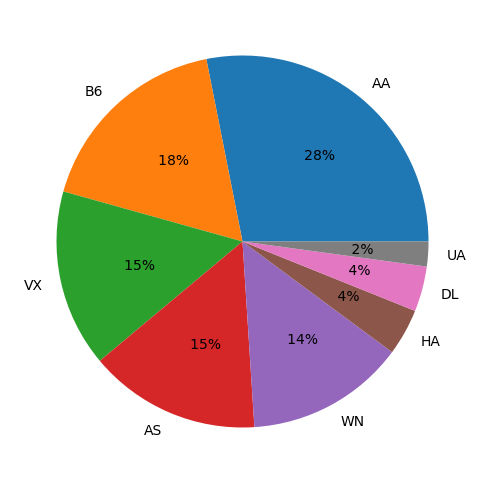

In [19]:
axis = plt.subplots(figsize=(6,8))
Name = df1["AIRLINE"].unique()
size = df1["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [20]:
# فكرتي هون اعرف الرحلات الي صارت له ديلاي من الوقت نفسه 

delay =[]
for row in df1['DEPARTURE_DELAY']:
    if row > 60:
        delay.append(3)
    elif row > 30:
        delay.append(2)
    elif row > 15:
        delay.append(1)
    else:
        delay.append(0)  
df1['delay'] = delay



In [21]:
df1

,MONTH,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
867,1,AA,9,N792AA,JFK,LAX,700,649.0,-11.0,380.0,...,1020,1026.0,6.0,0,NaN,NaN,NaN,NaN,NaN,0
1072,1,B6,3,N913JB,JFK,SJU,714,711.0,-3.0,233.0,...,1207,1133.0,-34.0,0,NaN,NaN,NaN,NaN,NaN,0
1567,1,VX,1,N837VA,SFO,DCA,800,752.0,-8.0,300.0,...,1600,1538.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,0
1610,1,AS,1,N523AS,DCA,SEA,800,756.0,-4.0,360.0,...,1100,1037.0,-23.0,0,NaN,NaN,NaN,NaN,NaN,0
1611,1,AS,8,N464AS,SEA,EWR,800,809.0,9.0,309.0,...,1609,1548.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047631,3,AS,5,N563AS,DCA,LAX,915,911.0,-4.0,366.0,...,1221,1201.0,-20.0,0,NaN,NaN,NaN,NaN,NaN,0
1047929,3,WN,8,N684WN,DAL,SAT,935,936.0,1.0,65.0,...,1040,1036.0,-4.0,0,NaN,NaN,NaN,NaN,NaN,0
1048016,3,WN,5,N256WN,HOU,PHX,940,936.0,-4.0,175.0,...,1035,1016.0,-19.0,0,NaN,NaN,NaN,NaN,NaN,0
1048039,3,B6,5,N706JB,EWR,FLL,941,931.0,-10.0,185.0,...,1246,1221.0,-25.0,0,NaN,NaN,NaN,NaN,NaN,0


In [22]:
df1.value_counts('delay')

delay
0    2951
1     203
3     167
2     161
Name: count, dtype: int64

<Axes: >

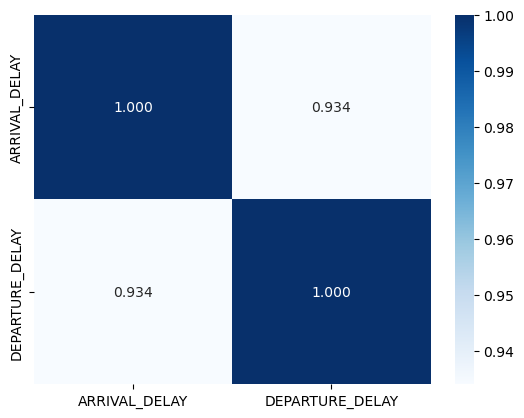

In [53]:
sns.heatmap(df1[['ARRIVAL_DELAY','DEPARTURE_DELAY']].corr(), annot=True, cmap='Blues',fmt='.3f')

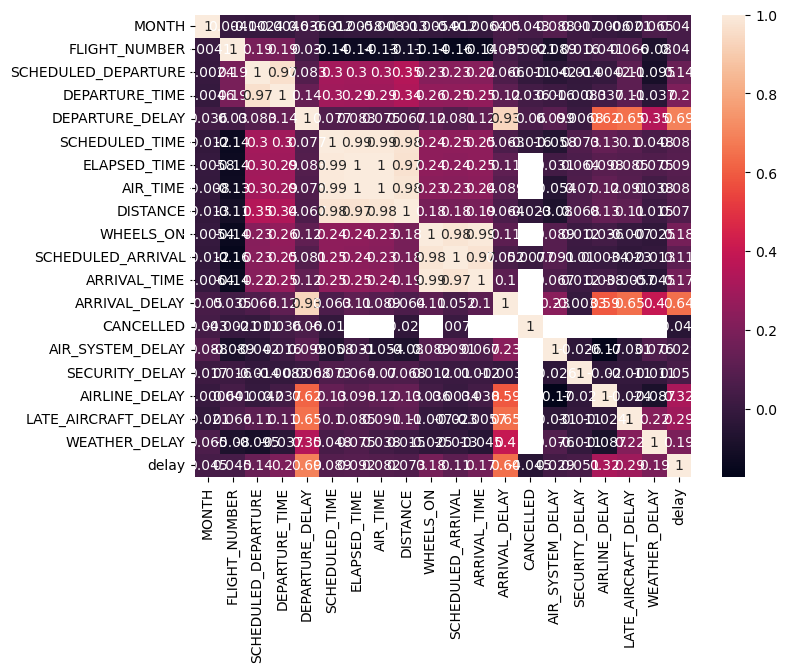

In [56]:
plt.figure(figsize=(8,6))

sns.heatmap(df1.corr(numeric_only=True), annot=True)
plt.show()

In [ ]:
df1.nlargest(10, ['DEPARTURE_DELAY'])


# the nlargest is is a method provided by the heapq module that allows you to find the n largest elements from an iterable, 
# such as a list. It's efficient for this purpose, especially with large datasets.

#[10] تمثل الrow

,MONTH,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
877897,2,AA,5,N354AA,DFW,HNL,1315,1019.0,1264.0,523.0,...,1758,1533.0,1295.0,0,31.0,0.0,0.0,1039.0,225.0,3
671546,2,HA,7,N392HA,LAS,HNL,900,323.0,1103.0,380.0,...,1320,740.0,1100.0,0,0.0,0.0,1046.0,54.0,0.0,3
877108,2,AA,3,N788AA,JFK,LAX,1230,1831.0,361.0,385.0,...,1555,2147.0,352.0,0,0.0,0.0,352.0,0.0,0.0,3
840872,2,AA,2,N785AA,LAX,JFK,900,1445.0,345.0,332.0,...,1732,2258.0,326.0,0,0.0,0.0,0.0,326.0,0.0,3
69615,1,AA,7,N379AA,DFW,OGG,1215,1735.0,320.0,500.0,...,1635,2136.0,301.0,0,0.0,0.0,254.0,47.0,0.0,3
270803,1,AA,6,N377AA,OGG,DFW,1815,2326.0,311.0,424.0,...,519,1027.0,308.0,0,0.0,0.0,280.0,28.0,0.0,3
244146,1,AA,8,N5ERAA,HNL,DFW,1745,2251.0,306.0,441.0,...,506,1002.0,296.0,0,0.0,0.0,36.0,260.0,0.0,3
714741,2,B6,2,N618JB,FLL,JFK,818,1312.0,294.0,162.0,...,1100,1538.0,278.0,0,0.0,0.0,278.0,0.0,0.0,3
6205,1,AA,5,N376AA,DFW,HNL,1305,1754.0,289.0,515.0,...,1740,2240.0,300.0,0,11.0,0.0,197.0,92.0,0.0,3
91119,1,AA,8,N386AA,HNL,DFW,1745,2234.0,289.0,441.0,...,506,1012.0,306.0,0,17.0,0.0,0.0,289.0,0.0,3


In [25]:
df2 = df1.copy()
df2 = df2[df2.DEPARTURE_DELAY > 1]

In [26]:
df2

#Still have a Nall val

,MONTH,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
1611,1,AS,8,N464AS,SEA,EWR,800,809.0,9.0,309.0,...,1609,1548.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,0
1903,1,B6,2,N633JB,FLL,JFK,818,901.0,43.0,162.0,...,1100,1140.0,40.0,0,0.0,0.0,27.0,13.0,0.0,2
2009,1,WN,7,N670SW,DAL,HOU,830,844.0,14.0,65.0,...,935,940.0,5.0,0,NaN,NaN,NaN,NaN,NaN,0
3087,1,B6,5,N566JB,EWR,FLL,945,1005.0,20.0,187.0,...,1252,1255.0,3.0,0,NaN,NaN,NaN,NaN,NaN,1
3171,1,B6,1,N715JB,JFK,FLL,950,1013.0,23.0,186.0,...,1256,1314.0,18.0,0,0.0,0.0,18.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043346,3,B6,8,N583JB,LAS,FLL,2238,2247.0,9.0,266.0,...,604,632.0,28.0,0,19.0,0.0,0.0,9.0,0.0,0
1045314,3,WN,4,N527SW,HOU,DAL,700,753.0,53.0,60.0,...,800,847.0,47.0,0,0.0,0.0,47.0,0.0,0.0,2
1046833,3,WN,7,N527SW,DAL,HOU,830,914.0,44.0,65.0,...,935,1014.0,39.0,0,0.0,0.0,0.0,39.0,0.0,2
1047206,3,WN,1,N618WN,HOU,SAT,850,854.0,4.0,55.0,...,945,952.0,7.0,0,NaN,NaN,NaN,NaN,NaN,0


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 1611 to 1047424
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                1080 non-null   int64  
 1   AIRLINE              1080 non-null   object 
 2   FLIGHT_NUMBER        1080 non-null   int64  
 3   TAIL_NUMBER          1080 non-null   object 
 4   ORIGIN_AIRPORT       1080 non-null   object 
 5   DESTINATION_AIRPORT  1080 non-null   object 
 6   SCHEDULED_DEPARTURE  1080 non-null   int64  
 7   DEPARTURE_TIME       1080 non-null   float64
 8   DEPARTURE_DELAY      1080 non-null   float64
 9   SCHEDULED_TIME       1080 non-null   float64
 10  ELAPSED_TIME         1073 non-null   float64
 11  AIR_TIME             1073 non-null   float64
 12  DISTANCE             1080 non-null   int64  
 13  WHEELS_ON            1076 non-null   float64
 14  SCHEDULED_ARRIVAL    1080 non-null   int64  
 15  ARRIVAL_TIME         1076 non-null   

In [28]:


df2["DEPARTURE_TIME"].fillna(df2["DEPARTURE_TIME"].mode()[0], inplace=True )
df2["DEPARTURE_DELAY"].fillna(df2["DEPARTURE_DELAY"].mode()[0], inplace=True )
df2["ELAPSED_TIME"].fillna(df2["ELAPSED_TIME"].mode()[0], inplace=True )
df2["WHEELS_ON"].fillna(df2["WHEELS_ON"].mode()[0], inplace=True )
df2["ARRIVAL_DELAY"].fillna(df2["ARRIVAL_DELAY"].mode()[0], inplace=True )
df2["ARRIVAL_TIME"].fillna(df2["ARRIVAL_TIME"].mode()[0], inplace=True )
df2["AIR_TIME"].fillna(df2["AIR_TIME"].mode()[0], inplace=True )
df2["ARRIVAL_DELAY"].fillna(df2["ARRIVAL_DELAY"].mode()[0], inplace=True )
df2["AIR_SYSTEM_DELAY"].fillna(df2["AIR_SYSTEM_DELAY"].mode()[0], inplace=True )
df2["SECURITY_DELAY"].fillna(df2["SECURITY_DELAY"].mode()[0], inplace=True )
df2["AIRLINE_DELAY"].fillna(df2["AIRLINE_DELAY"].mode()[0], inplace=True )
df2["WEATHER_DELAY"].fillna(df2["WEATHER_DELAY"].mode()[0], inplace=True )
df2["LATE_AIRCRAFT_DELAY"].fillna(df2["LATE_AIRCRAFT_DELAY"].mode()[0], inplace=True )

C:\Users\moham\AppData\Local\Temp\ipykernel_16180\1207467973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["DEPARTURE_TIME"].fillna(df2["DEPARTURE_TIME"].mode()[0], inplace=True )
C:\Users\moham\AppData\Local\Temp\ipykernel_16180\1207467973.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [29]:
df2.isnull().sum()

MONTH                  0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
delay                  0
dtype: int64

In [30]:
df2=df2[df2["delay"]==0]
df2

,MONTH,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
1611,1,AS,8,N464AS,SEA,EWR,800,809.0,9.0,309.0,...,1609,1548.0,-21.0,0,0.0,0.0,0.0,0.0,0.0,0
2009,1,WN,7,N670SW,DAL,HOU,830,844.0,14.0,65.0,...,935,940.0,5.0,0,0.0,0.0,0.0,0.0,0.0,0
6834,1,WN,7,N616SW,IND,ATL,1345,1355.0,10.0,90.0,...,1515,1517.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0
11157,1,B6,7,N641JB,FLL,LAS,1820,1824.0,4.0,335.0,...,2055,2029.0,-26.0,0,0.0,0.0,0.0,0.0,0.0,0
15603,1,AA,9,N798AA,JFK,LAX,700,715.0,15.0,380.0,...,1020,1109.0,49.0,0,34.0,0.0,15.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030858,3,AS,5,N583AS,DCA,LAX,915,920.0,5.0,366.0,...,1221,1211.0,-10.0,0,0.0,0.0,0.0,0.0,0.0,0
1031902,3,WN,1,N619SW,SAT,ELP,1015,1021.0,6.0,95.0,...,1050,1049.0,-1.0,0,0.0,0.0,0.0,0.0,0.0,0
1034883,3,AA,5,N391AA,DFW,HNL,1315,1319.0,4.0,523.0,...,1658,1658.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1043346,3,B6,8,N583JB,LAS,FLL,2238,2247.0,9.0,266.0,...,604,632.0,28.0,0,19.0,0.0,0.0,9.0,0.0,0


In [31]:
#MM = df2.loc[:, df2.isna().mean() >= 0].columns
#df2 = df2.drop(MM, axis=1)
missing_columns = df2.loc[:, df2.isna().mean() >= 0.25].columns
df2 = df2.drop(missing_columns, axis=1)


df2 = df2[df2.CANCELLED != 1]


# بحذف كل الكولمنز الي مالهم فايده بعد ما ن
df2 = df2.drop(['SCHEDULED_DEPARTURE',
                  'WHEELS_ON','SCHEDULED_ARRIVAL','CANCELLED',], axis=1)
    
df_pp = df2.fillna(0)

df_pp.head(30)

,MONTH,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
1611,1,AS,8,N464AS,SEA,EWR,809.0,9.0,309.0,279.0,262.0,2402,1548.0,-21.0,0.0,0.0,0.0,0.0,0.0,0
2009,1,WN,7,N670SW,DAL,HOU,844.0,14.0,65.0,56.0,46.0,239,940.0,5.0,0.0,0.0,0.0,0.0,0.0,0
6834,1,WN,7,N616SW,IND,ATL,1355.0,10.0,90.0,82.0,69.0,432,1517.0,2.0,0.0,0.0,0.0,0.0,0.0,0
11157,1,B6,7,N641JB,FLL,LAS,1824.0,4.0,335.0,305.0,285.0,2173,2029.0,-26.0,0.0,0.0,0.0,0.0,0.0,0
15603,1,AA,9,N798AA,JFK,LAX,715.0,15.0,380.0,414.0,357.0,2475,1109.0,49.0,34.0,0.0,15.0,0.0,0.0,0
16513,1,HA,6,N381HA,HNL,LAS,758.0,8.0,345.0,346.0,309.0,2762,1544.0,9.0,0.0,0.0,0.0,0.0,0.0,0
16649,1,WN,8,N528SW,HOU,DAL,802.0,2.0,60.0,56.0,40.0,239,858.0,-2.0,0.0,0.0,0.0,0.0,0.0,0
17002,1,AS,4,N579AS,SEA,DCA,818.0,3.0,295.0,277.0,262.0,2329,1555.0,-15.0,0.0,0.0,0.0,0.0,0.0,0
17222,1,WN,7,N409WN,DAL,HOU,843.0,13.0,65.0,60.0,47.0,239,943.0,8.0,0.0,0.0,0.0,0.0,0.0,0
17759,1,WN,9,N526SW,DAL,HOU,904.0,4.0,65.0,59.0,49.0,239,1003.0,-2.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#df2 = df2.drop(['FLIGHT_NUMBER', 'TAIL_NUMBER','SCHEDULED_DEPARTURE',
                  #'WHEELS_ON','TAXI_IN','SCHEDULED_ARRIVAL','CANCELLED'], axis=1)
    
#df2 = df2.fillna(0)



KeyError: "['SCHEDULED_DEPARTURE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'CANCELLED'] not found in axis"

In [32]:
df2.head(5)

,MONTH,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
1611,1,AS,8,N464AS,SEA,EWR,809.0,9.0,309.0,279.0,262.0,2402,1548.0,-21.0,0.0,0.0,0.0,0.0,0.0,0
2009,1,WN,7,N670SW,DAL,HOU,844.0,14.0,65.0,56.0,46.0,239,940.0,5.0,0.0,0.0,0.0,0.0,0.0,0
6834,1,WN,7,N616SW,IND,ATL,1355.0,10.0,90.0,82.0,69.0,432,1517.0,2.0,0.0,0.0,0.0,0.0,0.0,0
11157,1,B6,7,N641JB,FLL,LAS,1824.0,4.0,335.0,305.0,285.0,2173,2029.0,-26.0,0.0,0.0,0.0,0.0,0.0,0
15603,1,AA,9,N798AA,JFK,LAX,715.0,15.0,380.0,414.0,357.0,2475,1109.0,49.0,34.0,0.0,15.0,0.0,0.0,0


In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df2.columns:
    if df2[col].dtype=='object':
        df2[col]=le.fit_transform(df2[col])

In [34]:
x=df2.iloc[:, 0:19]

y=df2.iloc[: , 19: ]

In [41]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2 , random_state=42)

In [ ]:
#x,y=SMOTE().fit_resample(x,y)

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [42]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 1611 to 1047206
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   delay   549 non-null    int64
dtypes: int64(1)
memory usage: 8.6 KB


In [43]:
y

,delay
1611,0
2009,0
6834,0
11157,0
15603,0
...,...
1030858,0
1031902,0
1034883,0
1043346,0


In [44]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x=sc.fit_transform(x)

In [45]:
print(x)

[[-1.04446915 -1.08499342  1.05683976 ... -0.26852818 -0.17756292
  -0.12079964]
 [-1.04446915  1.25093359  0.67157746 ... -0.26852818 -0.17756292
  -0.12079964]
 [-1.04446915  1.25093359  0.67157746 ... -0.26852818 -0.17756292
  -0.12079964]
 ...
 [ 1.80125573 -1.47431459 -0.09894715 ... -0.26852818 -0.17756292
  -0.12079964]
 [ 1.80125573 -0.69567225  1.05683976 ... -0.26852818  4.64297765
  -0.12079964]
 [ 1.80125573  1.25093359 -1.63999637 ... -0.26852818 -0.17756292
  -0.12079964]]


In [48]:
RF=RandomForestClassifier(n_estimators=500, max_depth=6)

RF.fit(x_train,y_train)

y_pred=RF.predict(x_test)


from sklearn.metrics import accuracy_score

acc_RF=accuracy_score(y_pred, y_test )

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [50]:
ac=acc_RF*100
ac

100.0